In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
census_database_path = "C:/Users/anton/Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{census_database_path}")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
climate_data = pd.read_sql("SELECT * FROM measurement ORDER BY DATE DESC", conn)
climate_data.head()

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0


# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
data1 = engine.execute("SELECT date FROM measurement WHERE Date > 2017")
data2 = engine.execute("SELECT prcp FROM measurement WHERE Date > 2017")


date = []
for record in data1:
    date.append(record)
    
precipitation = []
for record in data2:
    precipitation.append(record)
    

#plot = plot('precipitation', 'date', data=obj), sigue faltándome el plot

# Perform a query to retrieve the data and precipitation scores


In [12]:
# Calculate the date 1 year ago from the last data point in the database

climate_data = pd.read_sql("SELECT * FROM measurement ORDER BY DATE DESC", conn) #This gets me the last data point in database
climate_data.head()

#Me falta aquí el timestamp 

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0


In [13]:
#Set index to date 
climate_data = climate_data.set_index('date')
climate_data.dropna(inplace = True)  


In [14]:
# Sort the dataframe by date (no entiendo a que se refiere con esto)

climate_data.head()

,id,station,prcp,tobs
date,,,,
2017-08-23,2724,USC00519397,0.00,81.0
2017-08-23,7635,USC00514830,0.00,82.0
2017-08-23,12187,USC00519523,0.08,82.0
2017-08-23,19550,USC00516128,0.45,76.0
2017-08-22,2723,USC00519397,0.00,82.0


In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

#plt.plot(climate_data.index, climate_data['prcp'])

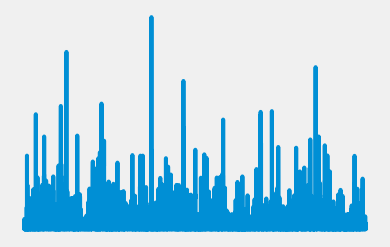

In [34]:
plt.plot(climate_data.index, climate_data['prcp'])

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)

![precipitation](Images/precipitation.png)

In [16]:
import re

# Use Pandas to calcualte the summary statistics for the precipitation data

climate_data = pd.read_sql("SELECT date, prcp FROM measurement ORDER BY DATE DESC", conn) #This gets me the last data point in database
climate_data.dropna(inplace = True)  

# list of dtypes to include 
perc =[.20, .40, .60, .80]
include =['object', 'float', 'int'] 
  
# calling describe method 
desc = climate_data.describe(percentiles = perc, include = include) 

#desc

![describe](Images/describe.png)

In [17]:
# Design a query to show how many stations are available in this dataset?
station_data = pd.read_sql("SELECT * FROM station", conn)
station_data


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [39]:
#station_climate = climate_data.merge(station_data, left_on='station', right_on='name')

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_group = pd.read_sql("SELECT station, count(station) as 'Station Count' FROM measurement GROUP BY station ORDER BY count(station) ASC", 
                            conn)
station_group


# List the stations and the counts in descending order.

station_group

,station,Station Count
0,USC00518838,511
1,USC00517948,1372
2,USC00511918,1979
3,USC00514830,2202
4,USC00516128,2612
5,USC00519523,2669
6,USC00513117,2709
7,USC00519397,2724
8,USC00519281,2772


In [65]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

station_group_lowest = pd.read_sql("SELECT station, min(tobs) FROM measurement WHERE station = 'USC00519281'", 
                            conn)
station_group_highest = pd.read_sql("SELECT station, max(tobs) FROM measurement WHERE station = 'USC00519281'", 
                            conn)
station_group_avg = pd.read_sql("SELECT station, avg(tobs) FROM measurement WHERE station = 'USC00519281'", 
                            conn)


In [76]:
# Choose the station with the highest number of temperature observations.

station_group = pd.read_sql("SELECT station, count(tobs) as 'Temperature Count' FROM measurement GROUP BY station ORDER BY count(station) ASC", 
                            conn)
station_group

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_months = pd.read_sql("SELECT station, tobs as 'Temperature Observation' FROM measurement  WHERE station = 'USC00519281' and Date > 2017", 
                            conn)
station_months

,station,Temperature Observation
0,USC00519281,72.0
1,USC00519281,70.0
2,USC00519281,64.0
3,USC00519281,63.0
4,USC00519281,63.0
5,USC00519281,62.0
6,USC00519281,70.0
7,USC00519281,70.0
8,USC00519281,62.0
9,USC00519281,62.0


In [77]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

ValueError: `bins` must increase monotonically, when an array

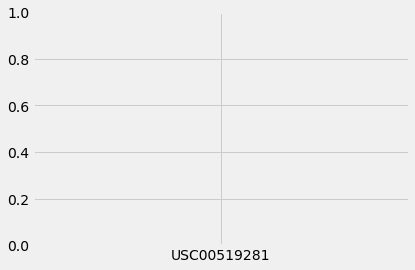

In [81]:
plt.hist(station_months.station, station_months['Temperature Observation'])

![precipitation](Images/station-histogram.png)

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [25]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [26]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [27]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [28]:
# Plot the daily normals as an area plot with `stacked=False`
